In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import mutual_info_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import spearmanr
from describe_data_with_jpg_indices import *

In [2]:
def open_df(file_path):
    df = pd.read_csv(file_path)
    return df

In [3]:
# base_dir = r'D:/MRc/FIIT/DP_Model/Datasets/kazachstan_multispectral_UAV/filght_session_02/2022-06-09' 
# # pixel_csv_name = os.path.join(base_dir,'veg_indices_perpixel_factor_8.csv')
# title = 'veg_indices_perpixel_plus_jpg.csv'
# patch_csv_name = os.path.join(base_dir,'veg_indices_perpixel_plus_jpg.csv')
# patch_csv_name = os.path.join(base_dir,'veg_indices_patched_plus_jpg.csv')

base_dir = r'D:\MRc\FIIT\DP_Model\Datasets\Multispectral_images_dataset' 
title = "veg_indices_perpixel_new_structure_Test_Images.csv"
pixelcsv = os.path.join(base_dir,'veg_indices_perpixel_new_structure_Train_Images.csv')
df = open_df(pixelcsv)
df

,Image,X,Y,NDVI,NGRDI,VARI,GLI,vNDVI,RGBVI,MGRVI,jpg_NDVI,jpg_NGRDI,jpg_VARI,jpg_GLI,jpg_vNDVI,jpg_RGBVI,jpg_MGRVI
0,Image_001.jpg,0,0,0.738885,0.289330,-0.886369,-0.132082,0.425207,-0.062837,0.533956,0.204283,0.037791,0.062145,0.086249,0.204283,0.176316,0.075475
1,Image_001.jpg,1,0,0.818017,0.319462,-1.239655,-0.095465,0.378486,0.008442,0.579746,0.323186,0.053179,0.079228,0.135269,0.323186,0.280961,0.106057
2,Image_001.jpg,2,0,0.834747,0.357627,2.970080,0.061307,0.417503,0.239839,0.634136,0.396384,0.070150,0.094126,0.195833,0.396384,0.414787,0.139613
3,Image_001.jpg,3,0,0.829639,0.498333,0.699175,0.471534,0.450579,0.772444,0.798387,0.657410,0.103549,0.133099,0.244283,0.657410,0.507315,0.204899
4,Image_001.jpg,4,0,0.825402,0.639785,0.749903,0.667520,0.443520,0.924288,0.907927,0.762052,0.099797,0.132987,0.222357,0.762052,0.458263,0.197622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10490695,Image_300.jpg,182,186,0.609347,0.124710,-0.128911,-0.362729,0.787739,-0.462751,0.245599,-0.064915,-0.012146,-0.022576,0.010112,-0.064915,0.021258,-0.024288
10490696,Image_300.jpg,183,186,0.555636,-0.052312,0.045593,-0.476591,0.719782,-0.668439,-0.104337,-0.098385,-0.017386,-0.032424,0.005179,-0.098385,0.011424,-0.034761
10490697,Image_300.jpg,184,186,0.471466,-0.160790,0.122352,-0.550475,0.593276,-0.768206,-0.313473,-0.199033,-0.020871,-0.039030,0.001755,-0.199033,0.004583,-0.041724
10490698,Image_300.jpg,185,186,0.339080,-0.190213,0.145225,-0.564007,0.315531,-0.786884,-0.367140,-0.334928,-0.022347,-0.041755,0.000853,-0.334928,0.002835,-0.044671


In [4]:
print(f"\nDescriptive Stats for {title}:")
print(df.describe())
    


Descriptive Stats for veg_indices_perpixel_new_structure_Test_Images.csv:
                  X             Y          NDVI         NGRDI          VARI  \
count  1.049070e+07  1.049070e+07  1.049070e+07  1.049070e+07  1.049070e+07   
mean   9.300000e+01  9.300000e+01  3.180627e-01  2.351744e-01  8.668062e-02   
std    5.398148e+01  5.398148e+01  3.832966e-01  2.571464e-01  6.803753e+02   
min    0.000000e+00  0.000000e+00 -9.692519e-01 -9.999556e-01 -1.038637e+06   
25%    4.600000e+01  4.600000e+01  4.720907e-02  6.569614e-02 -3.032183e-01   
50%    9.300000e+01  9.300000e+01  4.144796e-01  2.484355e-01  2.541147e-01   
75%    1.400000e+02  1.400000e+02  6.232609e-01  4.215578e-01  9.422811e-01   
max    1.860000e+02  1.860000e+02  9.999990e-01  9.999177e-01  3.645292e+05   

                GLI         vNDVI         RGBVI         MGRVI      jpg_NDVI  \
count  1.049070e+07  1.049070e+07  1.049070e+07  1.049070e+07  1.049070e+07   
mean   2.331311e-02  6.299458e-02  1.446868e-01  3.8821

In [5]:
print(df.groupby("Image").sum())

                     X        Y          NDVI         NGRDI          VARI  \
Image                                                                       
Image_001.jpg  3252117  3252117  20388.431240   9855.664901 -1.077433e+06   
Image_002.jpg  3252117  3252117  17682.254921   9410.397132 -3.057340e+04   
Image_003.jpg  3252117  3252117  15867.833884   8460.522943  2.524600e+04   
Image_004.jpg  3252117  3252117  12566.734626   8554.409682  1.471267e+04   
Image_005.jpg  3252117  3252117  13210.977125   9494.373119 -1.822866e+04   
...                ...      ...           ...           ...           ...   
Image_296.jpg  3252117  3252117  16311.593979  10864.398811 -6.697803e+03   
Image_297.jpg  3252117  3252117  13860.107494   6605.538642 -3.015337e+03   
Image_298.jpg  3252117  3252117  15236.637398   9190.241994  6.521042e+04   
Image_299.jpg  3252117  3252117  13078.587977   6525.482713  2.203770e+04   
Image_300.jpg  3252117  3252117  15660.874698  10281.769820  1.109839e+05   

In [6]:
# Correlation Matrix for Multispectral & JPG Indices
indices = ['NDVI', 'NGRDI', 'VARI', 'GLI', 'vNDVI', 'RGBVI','MGRVI']
jpg_indices = [f'jpg_{idx}' for idx in indices]


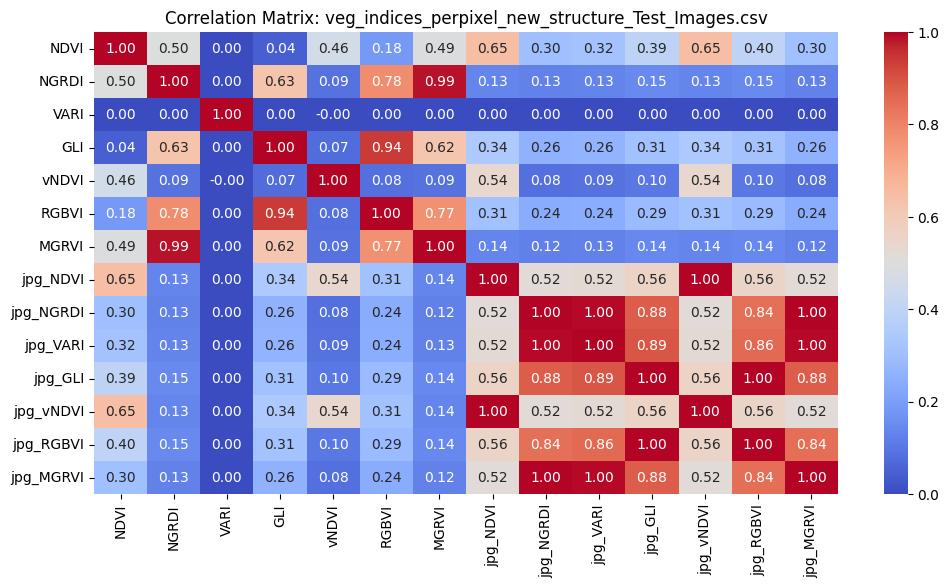

In [7]:

plt.figure(figsize=(12, 6))
sns.heatmap(df[indices + jpg_indices].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title(f'Correlation Matrix: {title}')
plt.show()

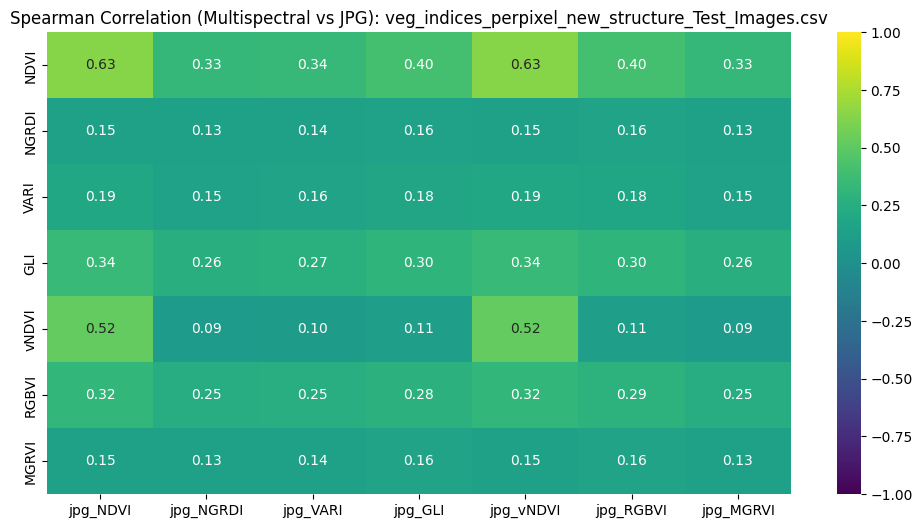

In [8]:
indices = ['NDVI', 'NGRDI', 'VARI', 'GLI', 'vNDVI', 'RGBVI','MGRVI']
jpg_indices = [f'jpg_{idx}' for idx in indices]

spearman_results = pd.DataFrame(index=indices, columns=jpg_indices)
mi_results = pd.DataFrame(index=indices, columns=jpg_indices)

for i in indices:
    for j in jpg_indices:
        corr, _ = spearmanr(df[i], df[j], nan_policy='omit')
        spearman_results.loc[i, j] = corr

        # Mutual Information
        mi = mutual_info_score(df[i].rank(method='dense'), df[j].rank(method='dense'))
        mi_results.loc[i, j] = mi

# Plot Spearman Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(spearman_results.astype(float), annot=True, cmap='viridis', fmt='.2f', vmin=-1, vmax=1)
plt.title(f'Spearman Correlation (Multispectral vs JPG): {title}')
plt.show()


KeyboardInterrupt: 

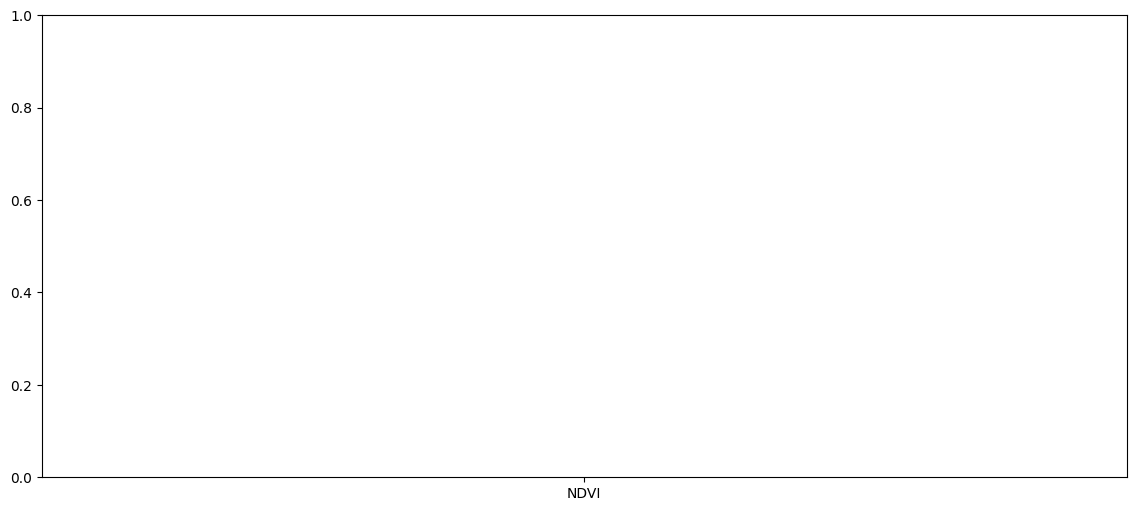

In [9]:
# --- 📊 Boxplot for Multispectral and JPG Indices ---
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[indices + jpg_indices])
plt.xticks(rotation=45)
plt.title(f'Boxplot of Vegetation Indices: {title}')
plt.show()

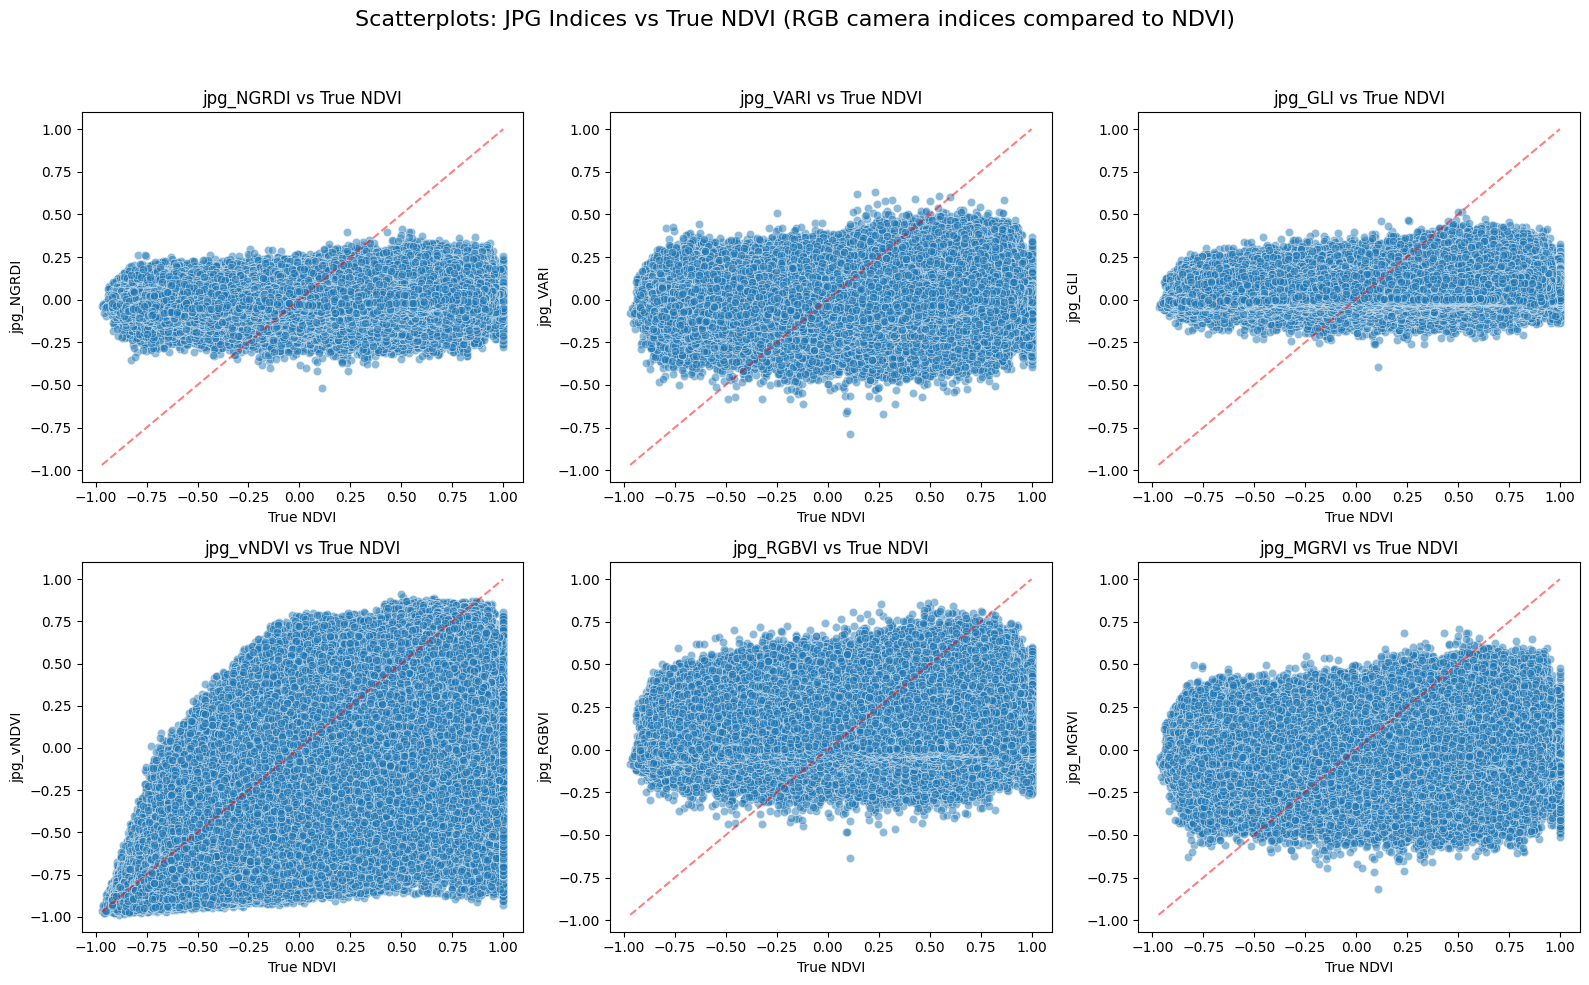

In [ ]:
plot_scatter_for_ndvi(df, jpg_indices,"RGB camera indices compared to NDVI")

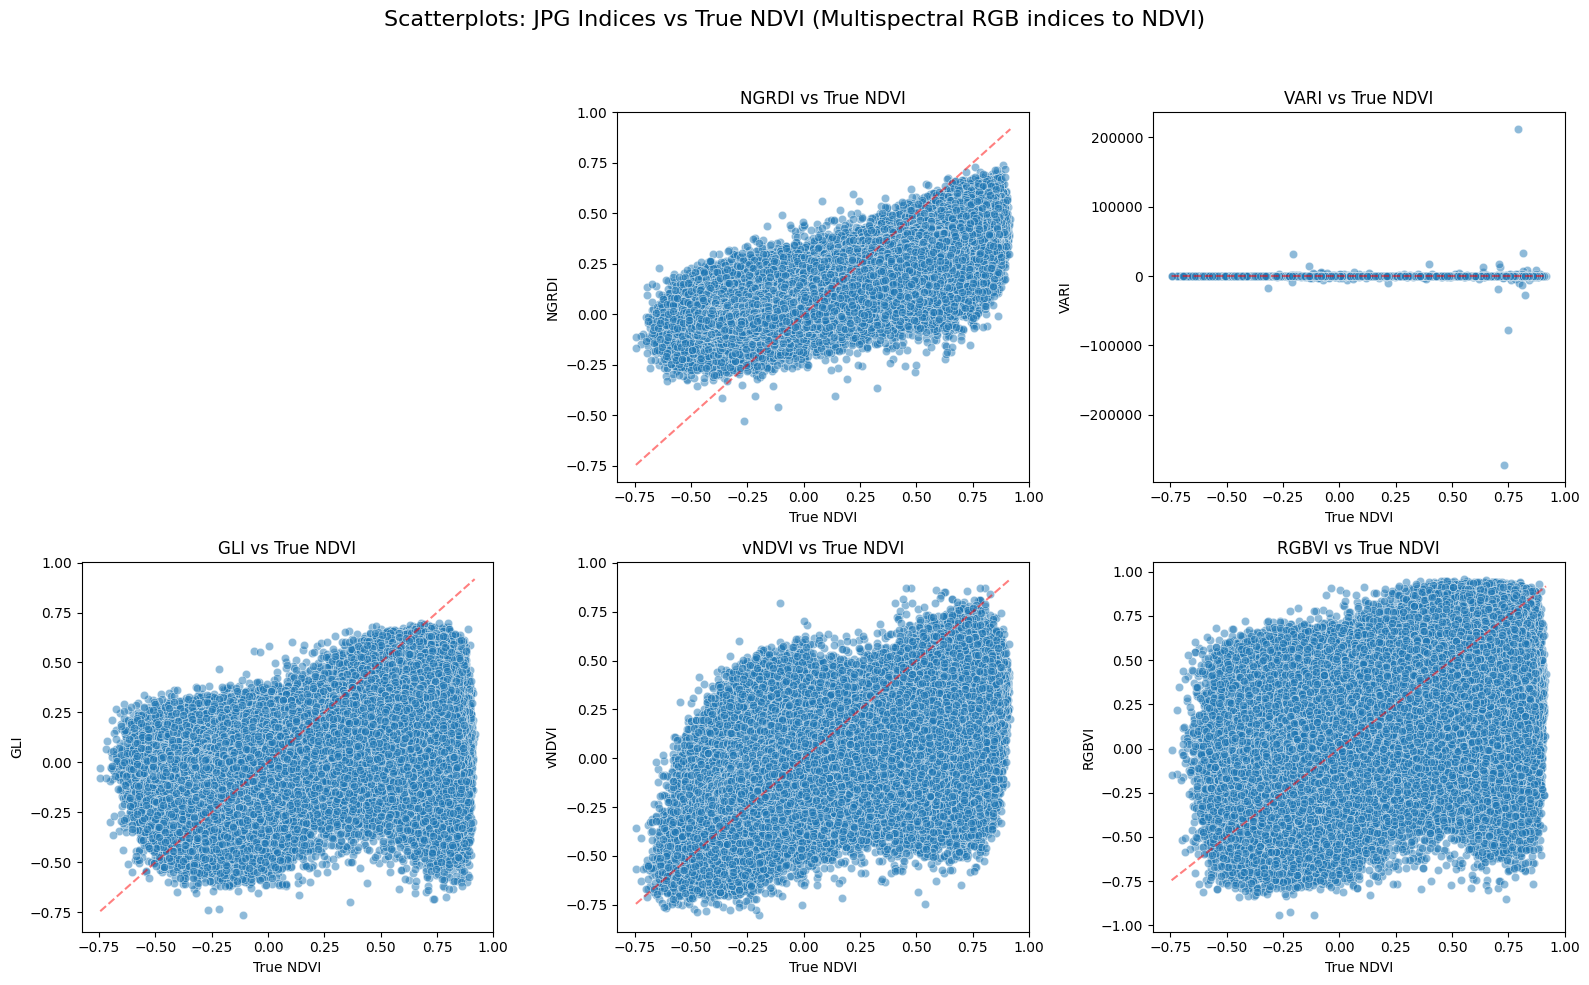

In [ ]:
plot_scatter_for_ndvi(df, indices, "Multispectral RGB indices to NDVI")

In [ ]:
regression_analysis(df, title)


📈 Linear Regression for veg_indices_perpixel_new_structure_Test_Images.csv:
R²: 0.439, MAE: 0.232, RMSE: 0.287
